In [73]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import bokeh as bk

In [2]:
imdb_ratings = pd.read_csv('movies.csv')

In [6]:
imdb_ratings.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [8]:
imdb_ratings.tail(15)

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
58773,58774,deadend.com,2002,120,NaN,6.9,53,64.5,4.5,0.0,...,4.5,4.5,NaN,0,0,0,1,0,0,0
58774,58775,e-Dreams,2001,94,NaN,6.8,86,4.5,0.0,0.0,...,4.5,14.5,NaN,0,0,0,0,1,0,0
58775,58776,eMale,2001,17,NaN,7.3,15,0.0,0.0,0.0,...,24.5,24.5,NaN,0,0,1,0,0,0,1
58776,58777,eRATicate,2003,9,NaN,6.0,5,0.0,0.0,0.0,...,24.5,44.5,NaN,0,0,1,0,0,0,1
58777,58778,eXXXorcismos,2002,78,NaN,4.2,11,34.5,0.0,0.0,...,4.5,24.5,NaN,0,0,0,1,0,0,0
58778,58779,eXistenZ,1999,97,NaN,6.7,14742,4.5,4.5,4.5,...,14.5,4.5,R,0,0,0,1,0,0,0
58779,58780,f2point8,2002,20,NaN,5.0,13,4.5,0.0,4.5,...,14.5,24.5,NaN,0,0,0,0,0,0,1
58780,58781,f8,2001,13,NaN,7.6,7,0.0,0.0,0.0,...,24.5,0.0,NaN,0,1,0,0,0,0,1
58781,58782,pURe kILLjoy,1998,87,NaN,5.2,6,0.0,14.5,14.5,...,0.0,14.5,NaN,0,0,0,0,0,0,0
58782,58783,sIDney,2002,15,NaN,7.0,8,14.5,0.0,0.0,...,14.5,24.5,NaN,1,0,0,0,0,0,1


In [9]:
imdb_ratings.describe()

,Unnamed: 0,year,length,budget,rating,votes,r1,r2,r3,r4,...,r8,r9,r10,Action,Animation,Comedy,Drama,Documentary,Romance,Short
count,58788.00000,58788.000000,58788.000000,5.215000e+03,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,...,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000,58788.000000
mean,29394.50000,1976.133582,82.337875,1.341251e+07,5.932850,632.130384,7.014382,4.022377,4.721159,6.374847,...,13.875995,8.954208,16.854018,0.079744,0.062768,0.293784,0.371011,0.059060,0.080697,0.160883
std,16970.77815,23.735125,44.347717,2.335008e+07,1.553031,3829.621413,10.936759,5.960056,6.451629,7.586141,...,11.316963,9.440597,15.650722,0.270899,0.242547,0.455498,0.483080,0.235738,0.272371,0.367426
min,1.00000,1893.000000,1.000000,0.000000e+00,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14697.75000,1958.000000,74.000000,2.500000e+05,5.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,4.500000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29394.50000,1983.000000,90.000000,3.000000e+06,6.100000,30.000000,4.500000,4.500000,4.500000,4.500000,...,14.500000,4.500000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44091.25000,1997.000000,100.000000,1.500000e+07,7.000000,112.000000,4.500000,4.500000,4.500000,4.500000,...,24.500000,14.500000,24.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,58788.00000,2005.000000,5220.000000,2.000000e+08,10.000000,157608.000000,100.000000,84.500000,84.500000,100.000000,...,100.000000,100.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
imdb_ratings.columns

Index(['Unnamed: 0', 'title', 'year', 'length', 'budget', 'rating', 'votes',
       'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa',
       'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance',
       'Short'],
      dtype='object')

In [14]:
imdb_ratings.dtypes

Unnamed: 0       int64
title           object
year             int64
length           int64
budget         float64
rating         float64
votes            int64
r1             float64
r2             float64
r3             float64
r4             float64
r5             float64
r6             float64
r7             float64
r8             float64
r9             float64
r10            float64
mpaa            object
Action           int64
Animation        int64
Comedy           int64
Drama            int64
Documentary      int64
Romance          int64
Short            int64
dtype: object

In [11]:
imdb_ratings.year.head()

0    1971
1    1939
2    1941
3    1996
4    1975
Name: year, dtype: int64

In [12]:
imdb_ratings['year'].head()

0    1971
1    1939
2    1941
3    1996
4    1975
Name: year, dtype: int64

In [32]:
imdb_ratings.year.value_counts().sort_index(ascending=False)

2005     349
2004    1945
2003    2158
2002    2168
2001    2121
2000    2048
1999    1927
1998    1705
1997    1568
1996    1390
1995    1248
1994    1199
1993    1016
1992     948
1991     888
1990     899
1989     944
1988     944
1987     957
1986     792
1985     792
1984     749
1983     698
1982     689
1981     661
1980     681
1979     632
1978     609
1977     617
1976     665
        ... 
1922      52
1921      53
1920      43
1919      52
1918      41
1917      37
1916      49
1915      54
1914      54
1913      32
1912      34
1911      22
1910      26
1909      30
1908      24
1907      12
1906      17
1905      17
1904      42
1903      37
1902       9
1901      28
1900      16
1899       9
1898       5
1897       9
1896      13
1895       3
1894       9
1893       1
dtype: int64

In [36]:
imdb_ratings[(imdb_ratings.year > 1999) & (imdb_ratings.mpaa == 'R')].head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
6,7,$windle,2002,93,NaN,5.3,200,4.5,0.0,4.5,...,4.5,14.5,R,1,0,0,1,0,0,0
42,43,'R Xmas,2001,83,NaN,4.9,288,14.5,4.5,4.5,...,4.5,4.5,R,0,0,0,1,0,0,0
122,123,100 Girls,2000,90,NaN,5.8,3349,4.5,4.5,4.5,...,4.5,4.5,R,0,0,1,0,0,1,0
123,124,100 Mile Rule,2002,98,1100000,5.6,181,4.5,4.5,4.5,...,4.5,14.5,R,0,0,1,0,0,0,0
152,153,11:11,2004,95,NaN,4.3,222,14.5,14.5,4.5,...,4.5,14.5,R,0,0,0,0,0,0,0


In [52]:
imdb_ratings.groupby('year').rating.aggregate([np.mean,np.std])

,mean,std
year,,
1893,7.000000,NaN
1894,4.888889,0.727056
1895,5.500000,0.624500
1896,5.269231,1.325635
1897,4.677778,0.732765
1898,5.040000,0.950263
1899,4.277778,0.713754
1900,4.731250,1.358783
1901,4.682143,1.081513


In [58]:
imdb_ratings['genre']=imdb_ratings[['Action','Animation','Comedy','Drama','Documentary','Romance']].idxmax(1) 

In [59]:
imdb_ratings['genre']

0             Comedy
1             Comedy
2          Animation
3             Comedy
4             Action
5              Drama
6             Action
7        Documentary
8              Drama
9             Action
10             Drama
11            Action
12            Comedy
13            Action
14            Action
15            Action
16             Drama
17       Documentary
18            Action
19         Animation
20            Comedy
21             Drama
22            Action
23            Action
24            Comedy
25            Action
26         Animation
27            Action
28             Drama
29            Comedy
            ...     
58758         Action
58759         Action
58760          Drama
58761          Drama
58762         Action
58763         Action
58764          Drama
58765          Drama
58766         Action
58767          Drama
58768         Action
58769         Action
58770         Action
58771          Drama
58772      Animation
58773          Drama
58774    Docu

In [109]:
genres_map = {"Action": 'red', "Animation": 'blue', "Comedy": 'yellow', "Drama": 'green', "Documentary": 'orange', "Romance": 'purple'}
imdb_ratings['genre_color']=imdb_ratings['genre'].apply(lambda x: genres_map[x])

In [110]:
imdb_ratings['genre_color']

0        yellow
1        yellow
2          blue
3        yellow
4           red
5         green
6           red
7        orange
8         green
9           red
10        green
11          red
12       yellow
13          red
14          red
15          red
16        green
17       orange
18          red
19         blue
20       yellow
21        green
22          red
23          red
24       yellow
25          red
26         blue
27          red
28        green
29       yellow
          ...  
58758       red
58759       red
58760     green
58761     green
58762       red
58763       red
58764     green
58765     green
58766       red
58767     green
58768       red
58769       red
58770       red
58771     green
58772      blue
58773     green
58774    orange
58775    yellow
58776    yellow
58777     green
58778     green
58779       red
58780      blue
58781       red
58782       red
58783      blue
58784     green
58785       red
58786       red
58787       red
Name: genre_color, dtype

In [70]:
pd.pivot_table(imdb_ratings,values='rating',index='year',columns=['genre'],aggfunc=np.mean)

genre,Action,Animation,Comedy,Documentary,Drama,Romance
year,,,,,,
1893,7.000000,NaN,NaN,NaN,NaN,NaN
1894,5.100000,NaN,NaN,4.720000,NaN,NaN
1895,5.700000,NaN,NaN,5.400000,NaN,NaN
1896,5.875000,NaN,3.900000,5.571429,2.100000,NaN
1897,5.900000,NaN,5.200000,4.300000,NaN,NaN
1898,6.000000,NaN,5.050000,5.500000,3.600000,NaN
1899,4.533333,NaN,3.600000,3.866667,4.850000,NaN
1900,5.625000,6.300000,5.250000,3.180000,5.000000,NaN
1901,4.375000,NaN,4.937500,4.314286,5.280000,NaN


In [191]:
imdb_ratings[['r1','r2','r3','r4','r5','r6','r7','r8','r9','r10']].sum(1)

0        105.0
1        110.5
2        118.0
3         94.5
4         87.0
5         95.0
6        100.5
7         85.0
8         91.5
9         90.5
10       100.5
11       100.5
12        91.5
13        77.0
14       105.0
15       115.0
16       115.0
17        96.0
18       105.0
19        93.5
20       131.5
21       110.5
22       105.0
23        86.0
24       111.5
25       110.5
26        97.0
27       131.5
28       105.0
29       127.0
         ...  
58758     92.5
58759    108.0
58760    106.0
58761     91.5
58762     98.0
58763    127.0
58764    118.0
58765    113.5
58766    100.5
58767     80.5
58768    100.5
58769     96.0
58770    113.5
58771     95.0
58772     94.5
58773     96.0
58774     96.0
58775     87.0
58776    113.5
58777     82.5
58778    105.0
58779     86.0
58780     88.0
58781     92.5
58782    107.0
58783     95.0
58784     94.5
58785    118.0
58786     85.0
58787     85.0
dtype: float64

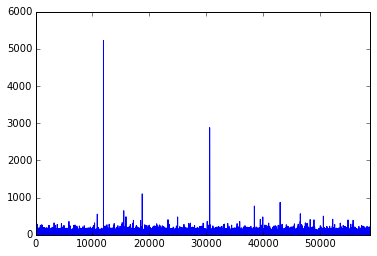

In [71]:
imdb_ratings.length.plot()

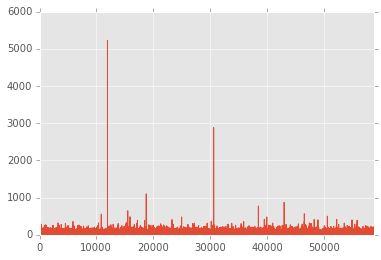

In [74]:
matplotlib.style.use('ggplot')
imdb_ratings.length.plot()

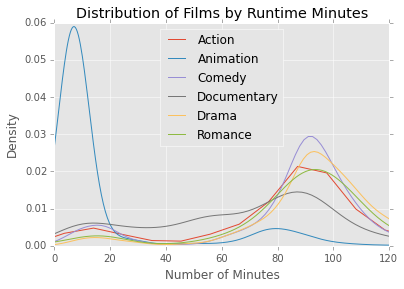

In [75]:
plot1 = imdb_ratings.groupby('genre').length.plot(kind='kde',xlim=(0,120),legend='genre')
plot1[0].set_xlabel('Number of Minutes')
plot1[0].set_title('Distribution of Films by Runtime Minutes')

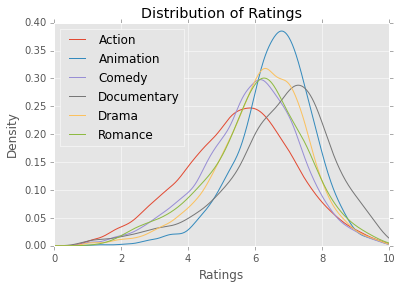

In [76]:
plot2 = imdb_ratings.groupby('genre').rating.plot(kind='kde',xlim=(0,10),legend='genre')
plot2[0].set_xlabel('Ratings')
plot2[0].set_title('Distribution of Ratings')

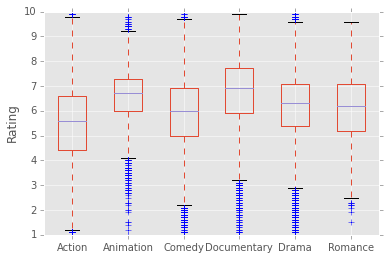

In [77]:
pd.pivot_table(imdb_ratings,values='rating',index='title',columns=['genre']).\
plot(kind='box',by='genre').\
set_ylabel('Rating')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130945c50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1312b51d0>]], dtype=object)

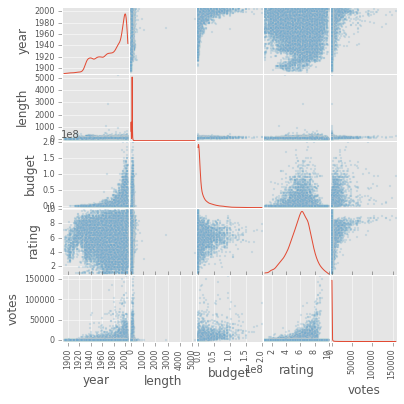

In [205]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(imdb_ratings[['year','length','budget','rating','votes']], alpha=0.2, figsize=(6, 6), diagonal='kde')
        

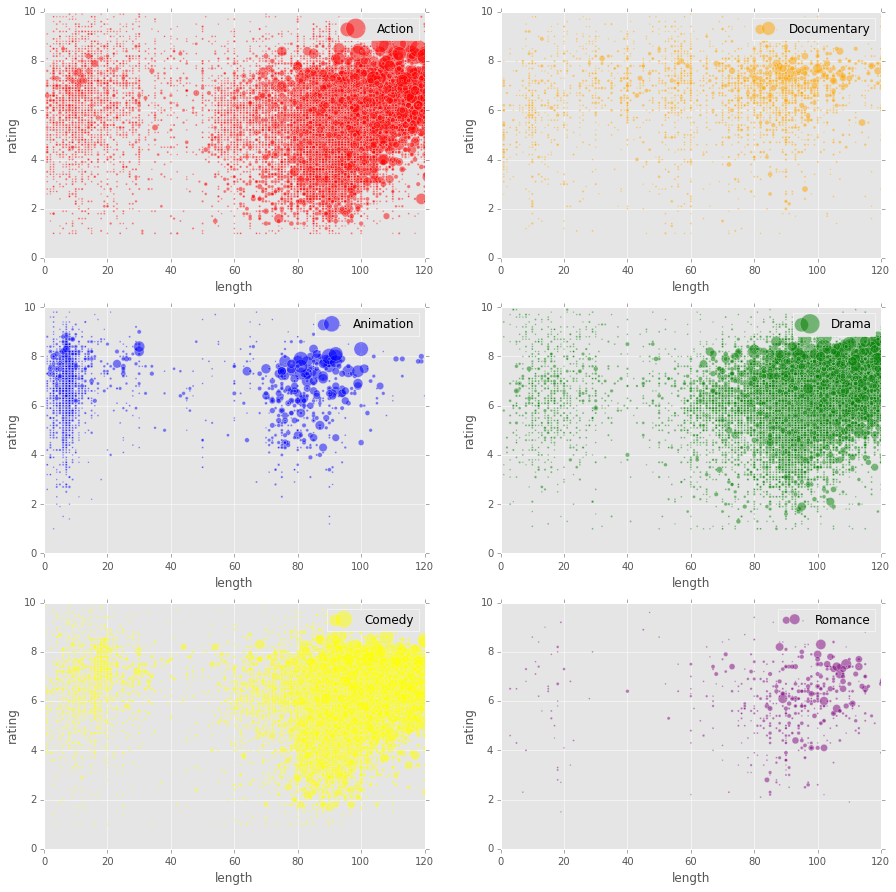

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
row = 0
col = 0
for index, genre in imdb_ratings.groupby('genre'):
    if row > 2:
        row = 0
        col += 1
    genre.groupby('genre').\
plot(ax=axes[row,col],kind='scatter',x='length',y='rating',s=np.sqrt(genre['votes']),c=genre['genre_color'],xlim=(0,120),ylim=(0,10),alpha=0.5,label=index)
    row += 1
   